In [72]:
!pip install yfinance --quiet
import yfinance as yf

import pandas as pd

In [73]:
reli=yf.Ticker("TATAMOTORS.NS").history('10y')

In [74]:
reli.to_csv('reli.csv')

In [75]:
df = pd.read_csv('reli.csv')

In [76]:
df

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2012-03-14,275.269155,280.553541,274.644611,278.631927,10136227,0.0,0
1,2012-03-15,278.583905,282.619292,273.539717,279.064331,9871044,0.0,0
2,2012-03-16,277.190729,286.174224,271.570066,275.461304,16463280,0.0,0
3,2012-03-19,276.277992,281.033942,270.321022,272.338715,9453260,0.0,0
4,2012-03-20,272.578910,274.740692,259.079662,260.761078,18382920,0.0,0
...,...,...,...,...,...,...,...,...
2460,2022-03-08,390.500000,395.450012,376.350006,391.750000,55543383,0.0,0
2461,2022-03-09,394.950012,409.250000,389.500000,405.899994,48376222,0.0,0
2462,2022-03-10,427.000000,434.950012,414.000000,419.600006,59776817,0.0,0
2463,2022-03-11,413.600006,421.149994,407.399994,418.149994,51510243,0.0,0


In [77]:
df1=df.reset_index()['Close']
df1

0       278.631927
1       279.064331
2       275.461304
3       272.338715
4       260.761078
           ...    
2460    391.750000
2461    405.899994
2462    419.600006
2463    418.149994
2464    408.200012
Name: Close, Length: 2465, dtype: float64

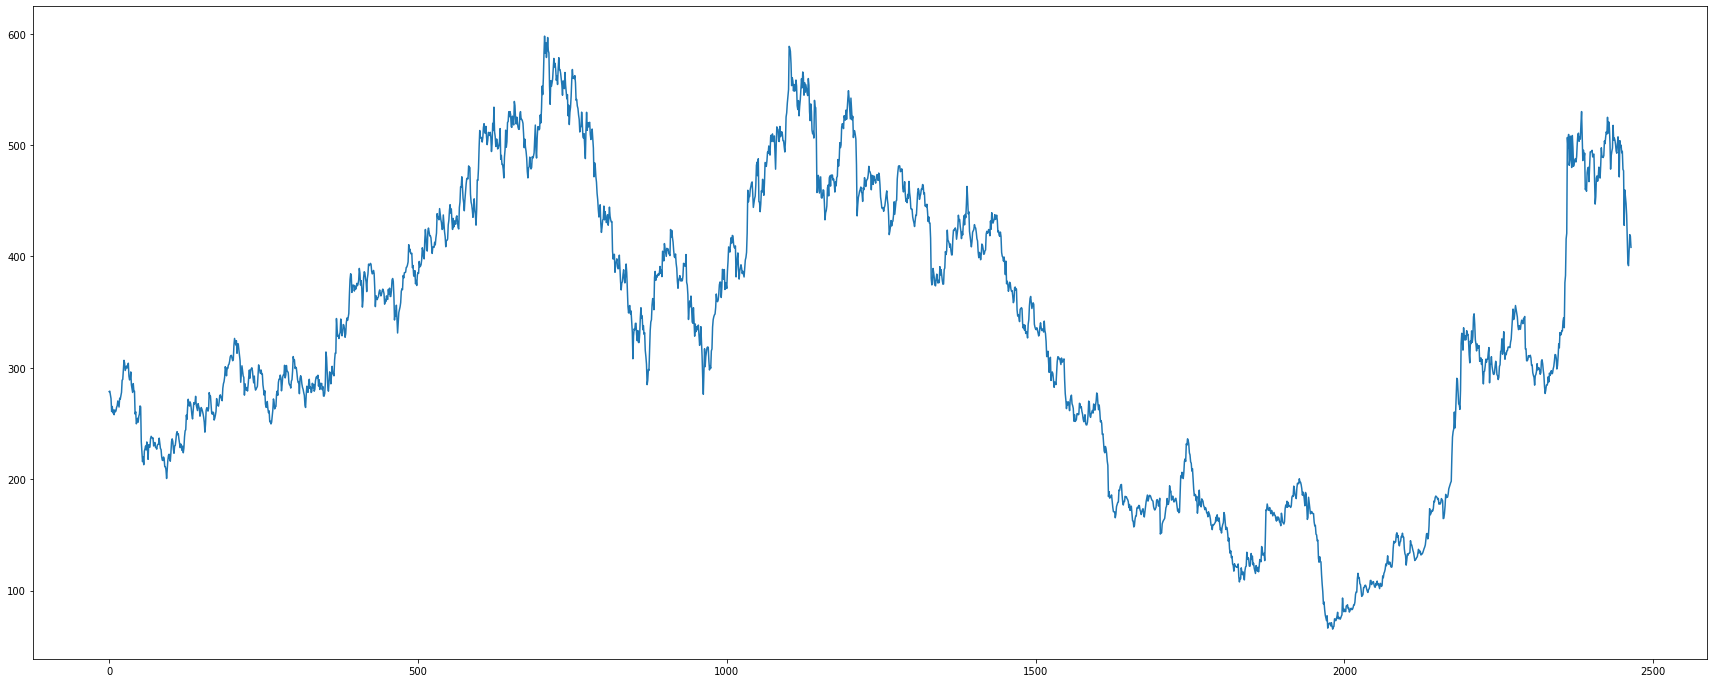

In [78]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(30,12))
ax.plot(df1)

In [79]:
import numpy as np
df1

0       278.631927
1       279.064331
2       275.461304
3       272.338715
4       260.761078
           ...    
2460    391.750000
2461    405.899994
2462    419.600006
2463    418.149994
2464    408.200012
Name: Close, Length: 2465, dtype: float64

In [80]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))
df1=scaler.fit_transform(np.array(df1).reshape(-1,1))
print(df1)

[[0.40055393]
 [0.40136581]
 [0.39460073]
 ...
 [0.66523685]
 [0.66251429]
 [0.64383212]]


In [81]:
##splitting dataset into train and test split
training_size=int(len(df1)*0.65)
test_size=len(df1)-training_size
train_data,test_data=df1[0:training_size,:],df1[training_size:len(df1),:1]

print(len(train_data))
print(len(test_data))

1602
863


In [82]:
import numpy
# convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-time_step-1):
		a = dataset[i:(i+time_step), 0]   ###i=0, 0,1,2,3-----99   100 
		dataX.append(a)
		dataY.append(dataset[i + time_step, 0])
	return numpy.array(dataX), numpy.array(dataY)

In [83]:
# reshape into X=t,t+1,t+2,t+3 and Y=t+4
time_step = 200
X_train, y_train = create_dataset(train_data, time_step)
X_test, ytest = create_dataset(test_data, time_step)

In [84]:
print(X_train.shape), print(y_train.shape)

(1401, 200)
(1401,)


(None, None)

In [85]:
print(X_test.shape), print(ytest.shape)

(662, 200)
(662,)


(None, None)

In [86]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [87]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM

In [88]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(None,1)))
model.add(LSTM(50,return_sequences=True))   
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')

model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_6 (LSTM)               (None, None, 50)          10400     
                                                                 
 lstm_7 (LSTM)               (None, None, 50)          20200     
                                                                 
 lstm_8 (LSTM)               (None, 50)                20200     
                                                                 
 dense_2 (Dense)             (None, 1)                 51        
                                                                 
Total params: 50,851
Trainable params: 50,851
Non-trainable params: 0
_________________________________________________________________


In [89]:
model.fit(X_train,y_train,validation_data=(X_test,ytest),epochs=8,batch_size=64,verbose=1)

Epoch 1/8
22/22 [==============================] - 22s 756ms/step - loss: 0.0904 - val_loss: 0.0133
Epoch 2/8
22/22 [==============================] - 15s 672ms/step - loss: 0.0076 - val_loss: 0.0136
Epoch 3/8
22/22 [==============================] - 9s 394ms/step - loss: 0.0045 - val_loss: 0.0092
Epoch 4/8
22/22 [==============================] - 9s 393ms/step - loss: 0.0031 - val_loss: 0.0044
Epoch 5/8
22/22 [==============================] - 9s 393ms/step - loss: 0.0022 - val_loss: 0.0031
Epoch 6/8
22/22 [==============================] - 9s 396ms/step - loss: 0.0020 - val_loss: 0.0028
Epoch 7/8
22/22 [==============================] - 9s 397ms/step - loss: 0.0019 - val_loss: 0.0028
Epoch 8/8
22/22 [==============================] - 9s 396ms/step - loss: 0.0019 - val_loss: 0.0028


In [90]:
import tensorflow as tf
### Lets Do the prediction and check performance metrics
train_predict=model.predict(X_train)
test_predict=model.predict(X_test)

In [91]:
##Transformback to original form
train_predict=scaler.inverse_transform(train_predict)
test_predict=scaler.inverse_transform(test_predict)

In [92]:
### Calculate RMSE performance metrics
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train,train_predict))

419.83588309832066

In [93]:
### Test Data RMSE
math.sqrt(mean_squared_error(ytest,test_predict))

275.99754671250224

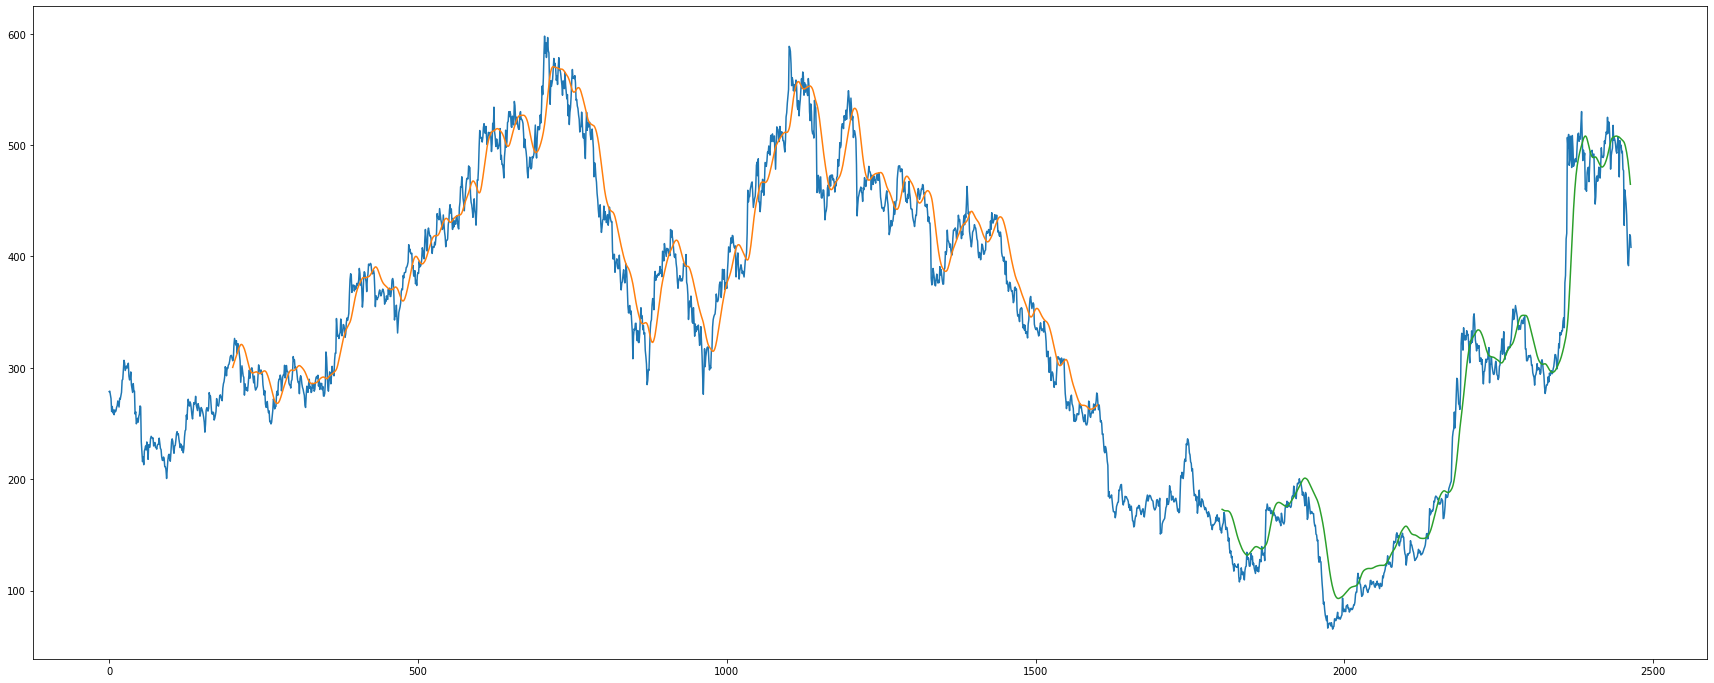

In [94]:
### Plotting 
# shift train predictions for plotting
look_back=200
trainPredictPlot = numpy.empty_like(df1)
trainPredictPlot[:, :] = np.nan
trainPredictPlot[look_back:len(train_predict)+look_back, :] = train_predict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(df1)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(train_predict)+(look_back*2)+1:len(df1)-1, :] = test_predict
# plot baseline and predictions
fig, ax = plt.subplots(figsize=(30,12))
ax.plot(scaler.inverse_transform(df1))
ax.plot(trainPredictPlot)
ax.plot(testPredictPlot)
plt.show()

In [95]:
len(test_data)

863

In [96]:
test_data[664]

array([0.47587998])

In [128]:
x_input=test_data[341:].reshape(1,-1)
x_input.shape

(1, 522)

In [129]:
temp_input=list(x_input)
temp_input=temp_input[0].tolist()
#temp_input
# temp_input[:100]
len(temp_input)

522

In [130]:
# demonstrate prediction for next 30 days
from numpy import array

lst_output=[]
n_steps=522
i=1
while(i<30):
    
    if(len(temp_input)>522):
        #print(temp_input)
        x_input=np.array(temp_input[1:])
       #print("{} day input {}".format(i,x_input))
        x_input=x_input.reshape(1,-1)
        x_input = x_input.reshape((1, n_steps, 1))
        #print(x_input)
        yhat = model.predict(x_input, verbose=0)
        #print("{} day output {}".format(i,yhat))
        temp_input.extend(yhat[0].tolist())
        temp_input=temp_input[1:]
        #print(temp_input)
        lst_output.extend(yhat.tolist())
        i=i+1
    else:
        x_input = x_input.reshape((1, -1,1))
        yhat = model.predict(x_input, verbose=0)
        #print(yhat[0])
        temp_input.extend(yhat[0].tolist())
        #t(len(temp_input))
        lst_output.extend(yhat.tolist())
        i=i+1
    

print(np.array(lst_output).shape)

(29, 1)


In [131]:
x_input = x_input[0]
x_input.shape

(522, 1)

In [134]:
day_new=np.arange(1,523)
day_pred=np.arange(0,29)

In [135]:
import matplotlib.pyplot as plt

In [136]:
len(day_pred)
#len(test_data)
#len(scaler.inverse_transform(lst_output))

29

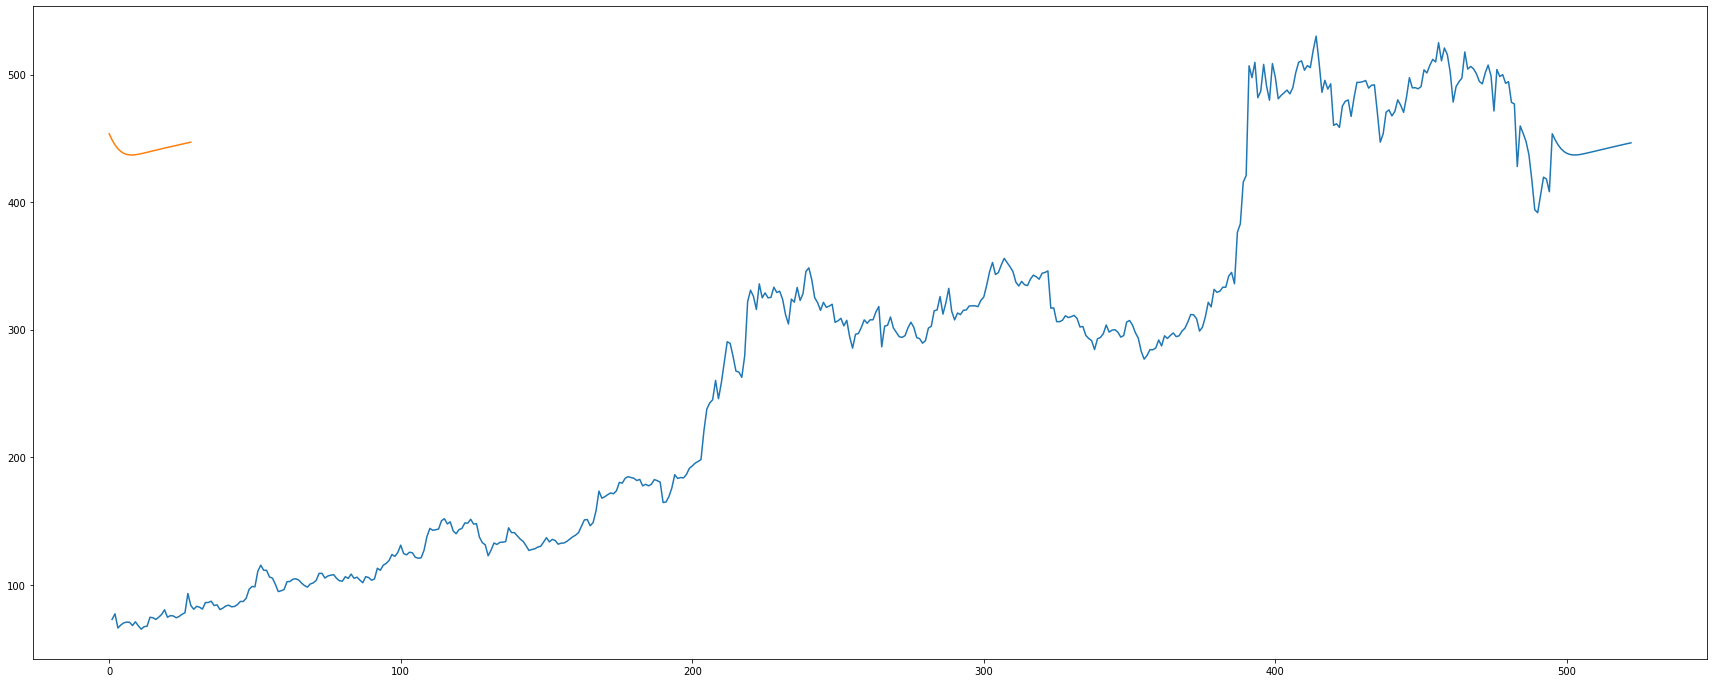

In [137]:
fig, ax = plt.subplots(figsize=(30,12))
ax.plot(day_new,scaler.inverse_transform(x_input))
ax.plot(day_pred,scaler.inverse_transform(lst_output))

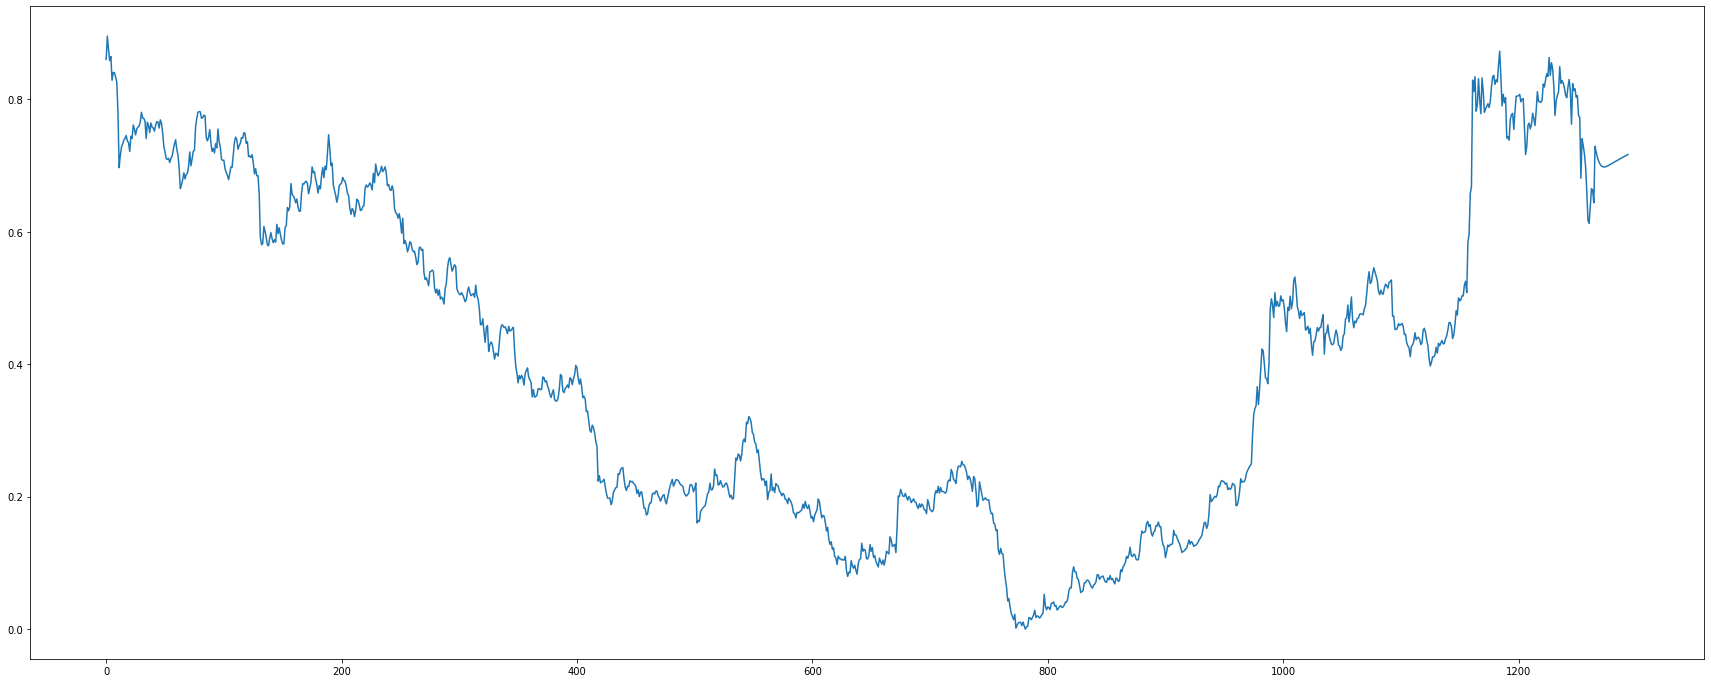

In [138]:
df3=df1.tolist()
df3.extend(lst_output)
fig, ax = plt.subplots(figsize=(30,12))
ax.plot(df3[1200:])

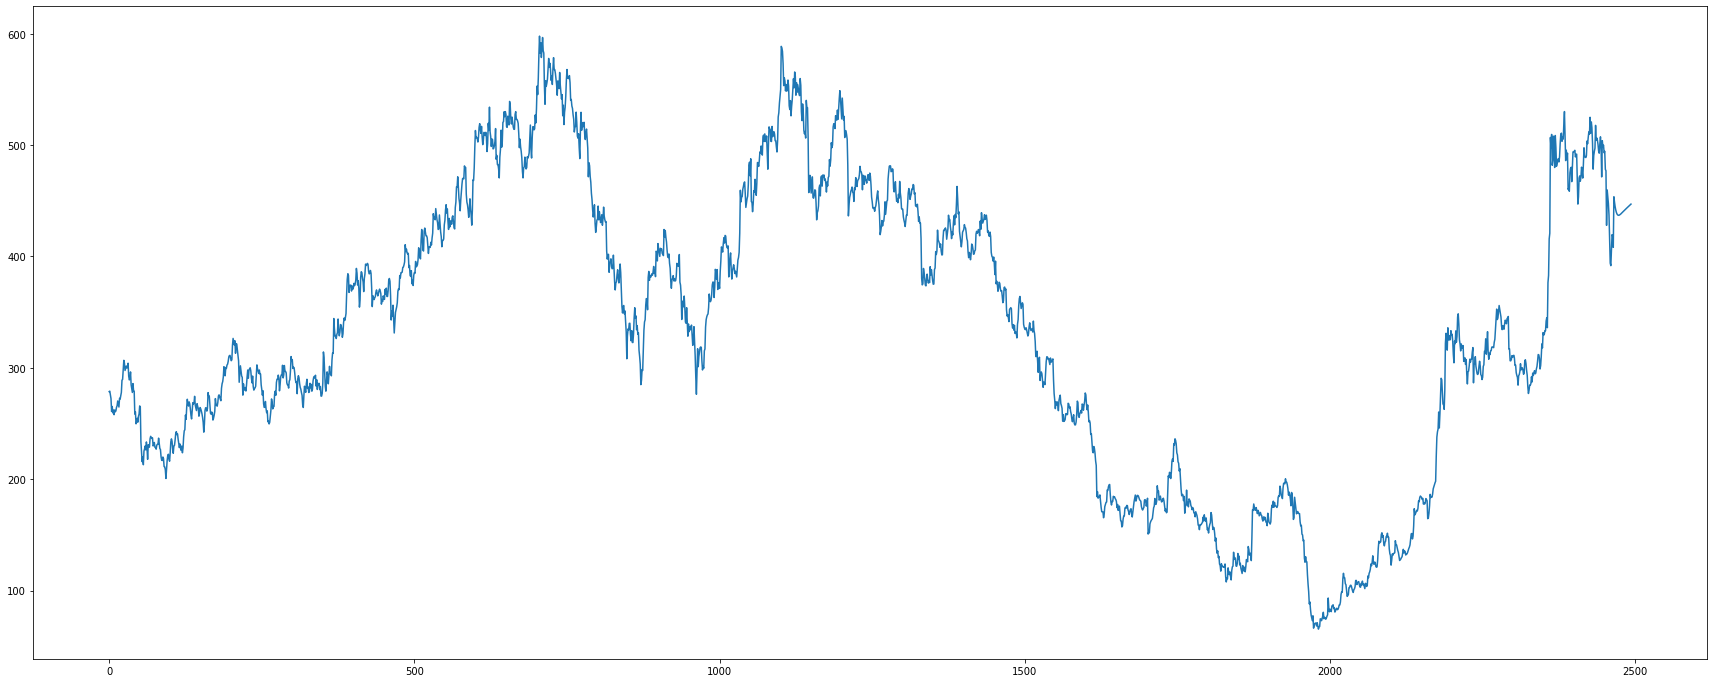

In [139]:
df3=scaler.inverse_transform(df3).tolist()
fig, ax = plt.subplots(figsize=(30,12))
ax.plot(df3)